In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
column_names = list(df.columns.values)
df.head()

In [ ]:
X = df.iloc[:][:]
y = iris["target"]
dict_bnb = {}
dict_mnb = {}
dict_gnb = {}
dict_dtr = {}
RocAucbnb = {}
RocAucmnb = {}
RocAucgnb = {}
RocAucdtr = {}
print(X, y)

In [4]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns
  
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(3,3)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels = iris.target_names, yticklabels=iris.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [5]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### Classification using BernoulliNB Naive Bayes

In [6]:
def FBouBernoulli(split, alpha_value = 1.0, binarize_value = 0.0, fit_prior_value = False):
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  #scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  #scaler.fit_transform(X_train)
  #scaler.transform(X_test)
  classifier = BernoulliNB(alpha = alpha_value, binarize = binarize_value, fit_prior = fit_prior_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value) + " binarize: " + str(binarize_value) + " fit_prior: " +str(fit_prior_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_bnb:
    dict_bnb[str(split)] = max(accuracy, dict_bnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_bnb[str(split)]:
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_bnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)


Train-test split: 0.3
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


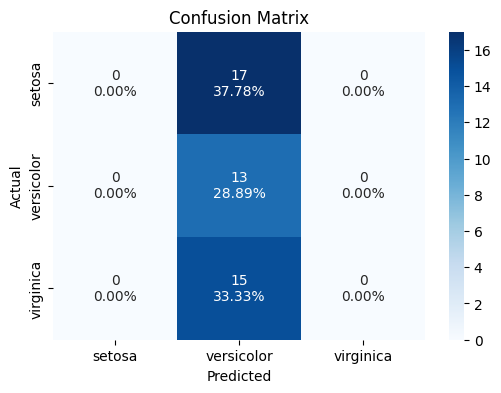

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        15

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

Train-test split: 0.3
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


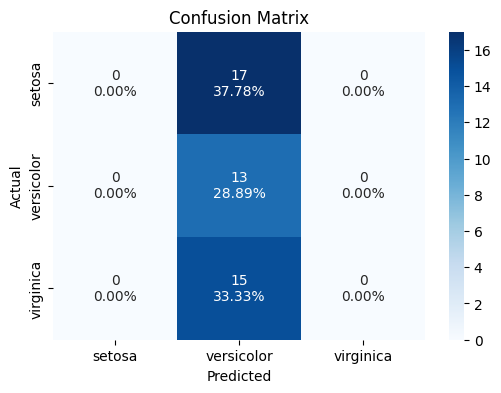

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        15

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45

Train-test split: 0.3
value: alpha: 1.0 binarize: 1.8 fit_prior: False
**********************************************
Confusion Matrix : 


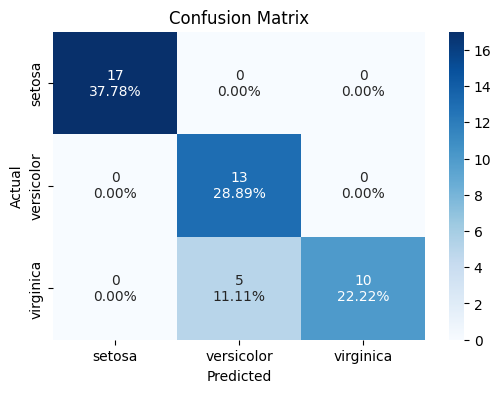

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.72      1.00      0.84        13
           2       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.88        45
weighted avg       0.92      0.89      0.89        45

Train-test split: 0.3
value: alpha: 1.0 binarize: 1.8 fit_prior: True
**********************************************
Confusion Matrix : 


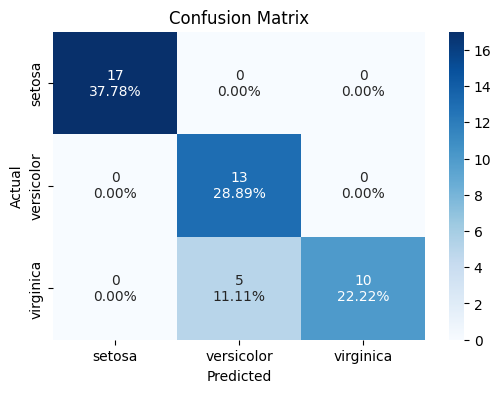

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.72      1.00      0.84        13
           2       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.88        45
weighted avg       0.92      0.89      0.89        45



In [7]:
## Train-Test split 0.3
FBouBernoulli(0.3)
FBouBernoulli(0.3, 1.0)
FBouBernoulli(0.3, 1.0, 1.8)
FBouBernoulli(0.3, 1.0, 1.8, True)

Train-test split: 0.4
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


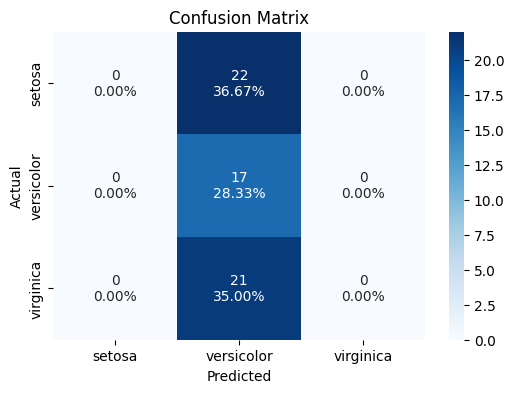

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.28      1.00      0.44        17
           2       0.00      0.00      0.00        21

    accuracy                           0.28        60
   macro avg       0.09      0.33      0.15        60
weighted avg       0.08      0.28      0.13        60

Train-test split: 0.4
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


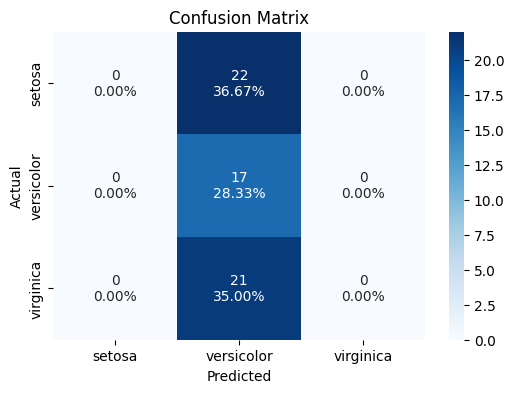

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.28      1.00      0.44        17
           2       0.00      0.00      0.00        21

    accuracy                           0.28        60
   macro avg       0.09      0.33      0.15        60
weighted avg       0.08      0.28      0.13        60

Train-test split: 0.4
value: alpha: 1.0 binarize: 1.7 fit_prior: False
**********************************************
Confusion Matrix : 


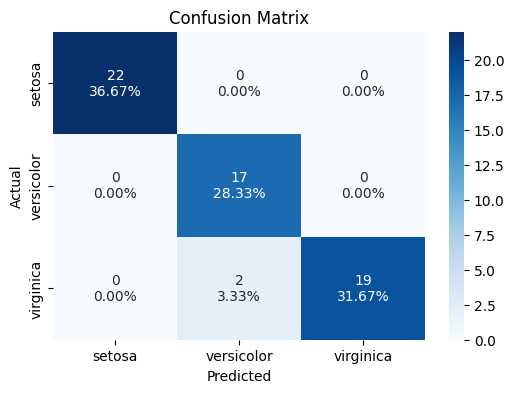

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      1.00      0.94        17
           2       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60

Train-test split: 0.4
value: alpha: 1.0 binarize: 1.7 fit_prior: True
**********************************************
Confusion Matrix : 


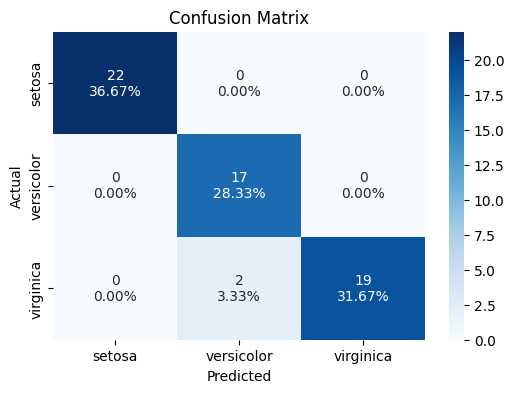

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      1.00      0.94        17
           2       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60



In [8]:
## Train-Test split 0.4
FBouBernoulli(0.4)
FBouBernoulli(0.4, 1.0)
FBouBernoulli(0.4, 1.0, 1.7)
FBouBernoulli(0.4, 1.0, 1.7, True)

Train-test split: 0.5
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


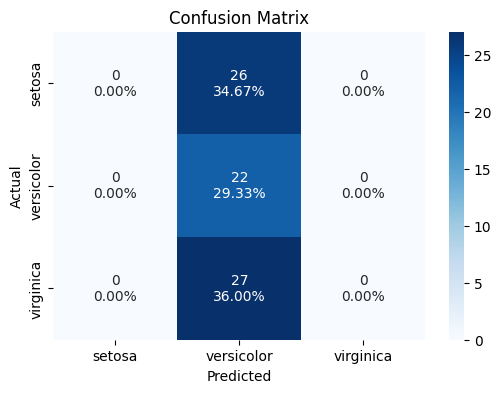

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.29      1.00      0.45        22
           2       0.00      0.00      0.00        27

    accuracy                           0.29        75
   macro avg       0.10      0.33      0.15        75
weighted avg       0.09      0.29      0.13        75

Train-test split: 0.5
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 


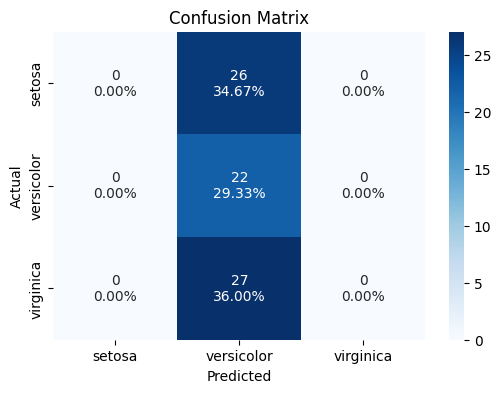

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.29      1.00      0.45        22
           2       0.00      0.00      0.00        27

    accuracy                           0.29        75
   macro avg       0.10      0.33      0.15        75
weighted avg       0.09      0.29      0.13        75

Train-test split: 0.5
value: alpha: 1.0 binarize: 1.75 fit_prior: False
**********************************************
Confusion Matrix : 


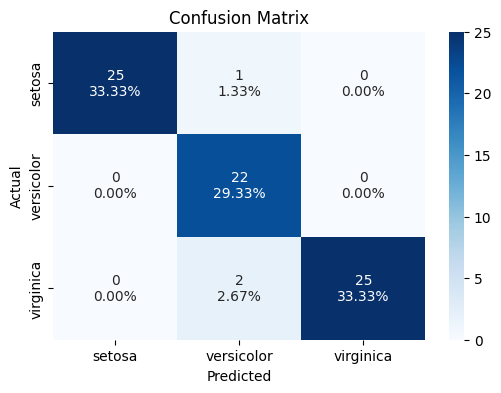

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.88      1.00      0.94        22
           2       1.00      0.93      0.96        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Train-test split: 0.5
value: alpha: 1.0 binarize: 1.75 fit_prior: True
**********************************************
Confusion Matrix : 


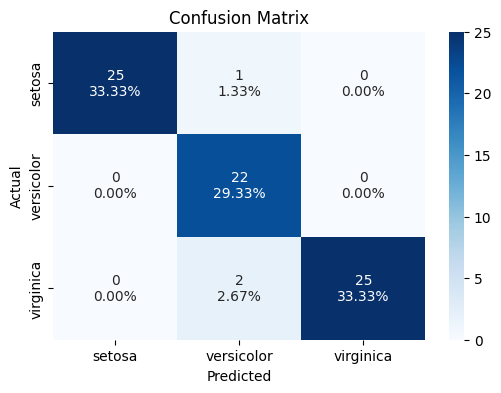

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.88      1.00      0.94        22
           2       1.00      0.93      0.96        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [9]:

## Train-Test split 0.5
FBouBernoulli(0.5)
FBouBernoulli(0.5, 1.0)
FBouBernoulli(0.5, 1.0, 1.75)
FBouBernoulli(0.5, 1.0, 1.75, True)

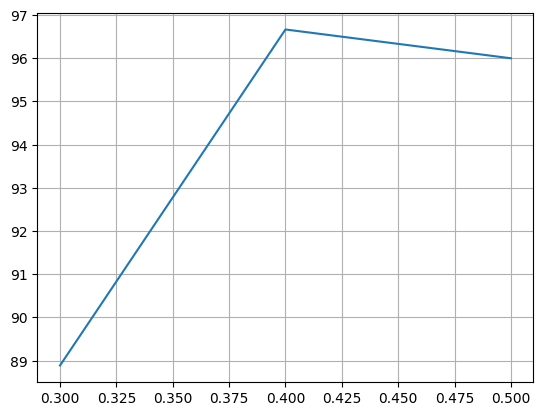

In [10]:
x_points = [float(key) for key in dict_bnb]
y_points = [i*100 for i in dict_bnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

## Classification using Multinomial Naive Bayes

Train-test split: 0.2
value: alpha: 1.0
**********************************************
Confusion Matrix : 


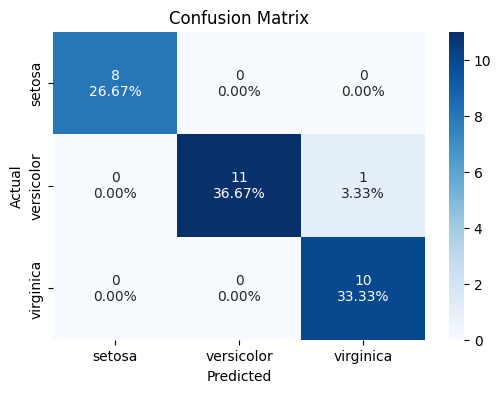

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix : 


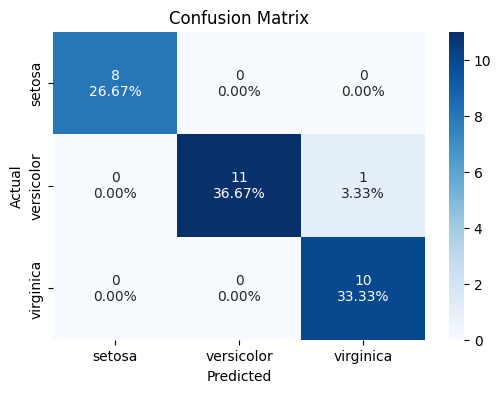

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train-test split: 0.2
value: alpha: 1.8
**********************************************
Confusion Matrix : 


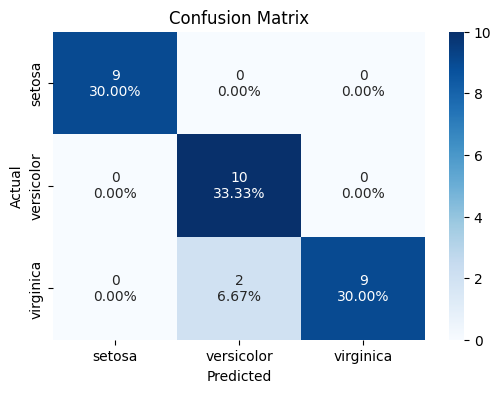

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix : 


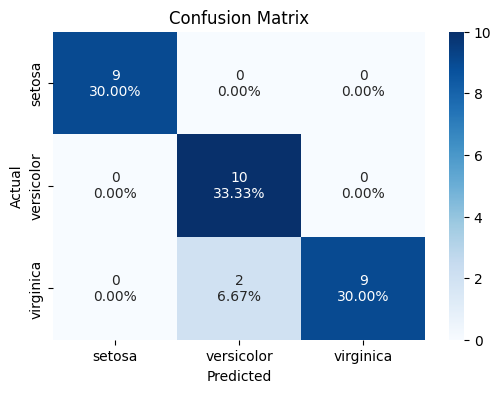

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [11]:
def FMultinomial(split, alpha_value = 1.0):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = MultinomialNB(alpha = alpha_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_mnb:
    dict_mnb[str(split)] = max(accuracy, dict_mnb[str(split)])
    if str(split) == '0.3' and accuracy > dict_mnb[str(split)]:
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mnb[str(split)] = accuracy
    if str(split) == '0.3':
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)
  reports(y_test, y_pred)

## Train-Test split 0.2
FMultinomial(0.2)
FMultinomial(0.2, 1.8)


Train-test split: 0.3
value: alpha: 1.0
**********************************************
Confusion Matrix : 


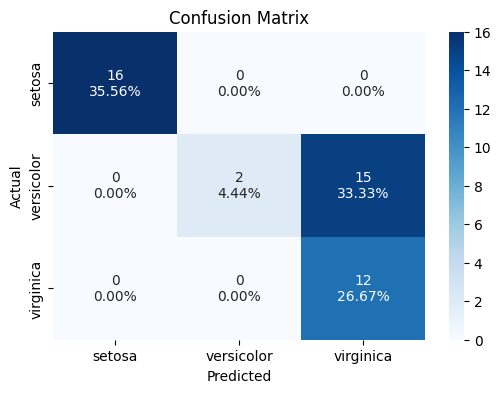

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.12      0.21        17
           2       0.44      1.00      0.62        12

    accuracy                           0.67        45
   macro avg       0.81      0.71      0.61        45
weighted avg       0.85      0.67      0.60        45

Confusion Matrix : 


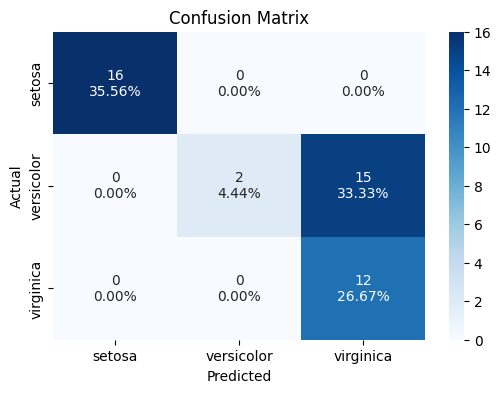

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.12      0.21        17
           2       0.44      1.00      0.62        12

    accuracy                           0.67        45
   macro avg       0.81      0.71      0.61        45
weighted avg       0.85      0.67      0.60        45

Train-test split: 0.3
value: alpha: 1.6
**********************************************
Confusion Matrix : 


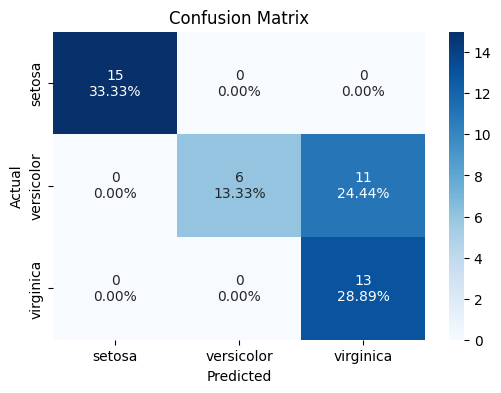

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.35      0.52        17
           2       0.54      1.00      0.70        13

    accuracy                           0.76        45
   macro avg       0.85      0.78      0.74        45
weighted avg       0.87      0.76      0.73        45

Confusion Matrix : 


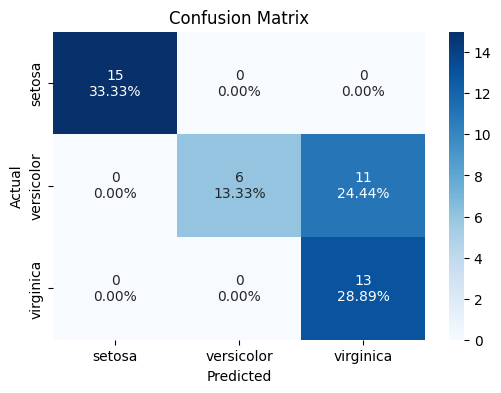

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.35      0.52        17
           2       0.54      1.00      0.70        13

    accuracy                           0.76        45
   macro avg       0.85      0.78      0.74        45
weighted avg       0.87      0.76      0.73        45



In [12]:
## Train-Test split 0.3
FMultinomial(0.3)
FMultinomial(0.3, 1.6)

Train-test split: 0.4
value: alpha: 1.0
**********************************************
Confusion Matrix : 


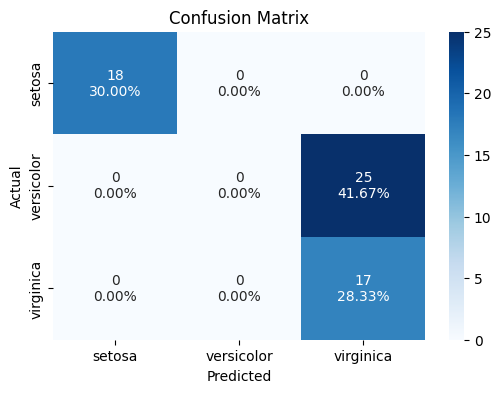

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.00      0.00      0.00        25
           2       0.40      1.00      0.58        17

    accuracy                           0.58        60
   macro avg       0.47      0.67      0.53        60
weighted avg       0.41      0.58      0.46        60

Confusion Matrix : 


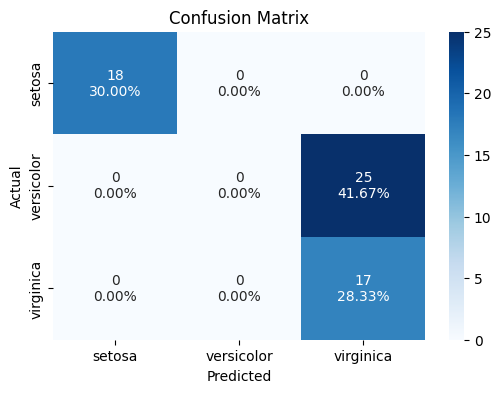

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.00      0.00      0.00        25
           2       0.40      1.00      0.58        17

    accuracy                           0.58        60
   macro avg       0.47      0.67      0.53        60
weighted avg       0.41      0.58      0.46        60

Train-test split: 0.4
value: alpha: 1.4
**********************************************
Confusion Matrix : 


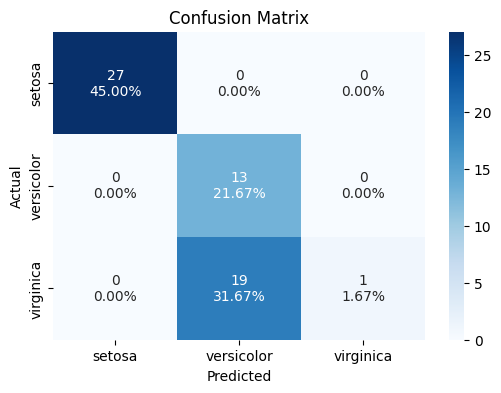

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.41      1.00      0.58        13
           2       1.00      0.05      0.10        20

    accuracy                           0.68        60
   macro avg       0.80      0.68      0.56        60
weighted avg       0.87      0.68      0.61        60

Confusion Matrix : 


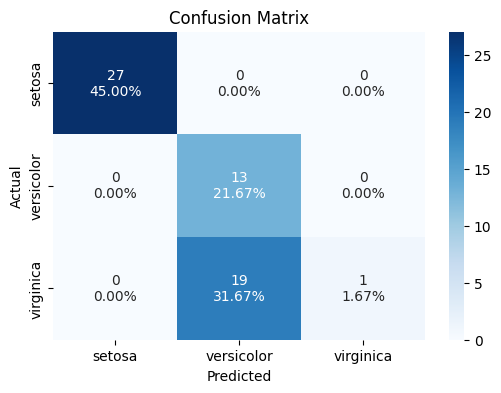

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.41      1.00      0.58        13
           2       1.00      0.05      0.10        20

    accuracy                           0.68        60
   macro avg       0.80      0.68      0.56        60
weighted avg       0.87      0.68      0.61        60



In [13]:
## Train-Test split 0.4
FMultinomial(0.4)
FMultinomial(0.4, 1.4)

Train-test split: 0.5
value: alpha: 1.0
**********************************************
Confusion Matrix : 


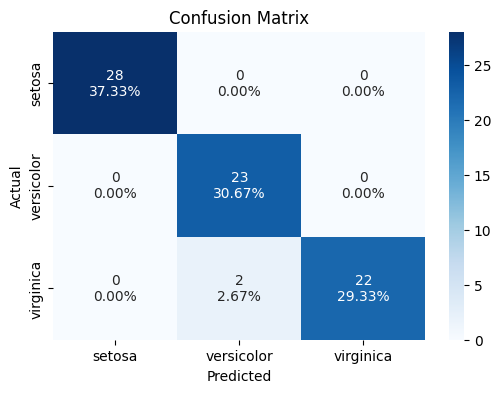

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.92      1.00      0.96        23
           2       1.00      0.92      0.96        24

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

Confusion Matrix : 


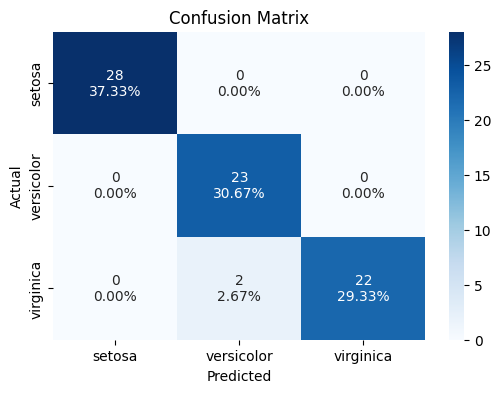

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.92      1.00      0.96        23
           2       1.00      0.92      0.96        24

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

Train-test split: 0.5
value: alpha: 1.5
**********************************************
Confusion Matrix : 


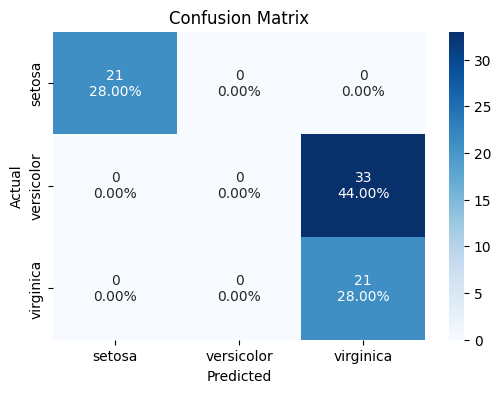

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        33
           2       0.39      1.00      0.56        21

    accuracy                           0.56        75
   macro avg       0.46      0.67      0.52        75
weighted avg       0.39      0.56      0.44        75

Confusion Matrix : 


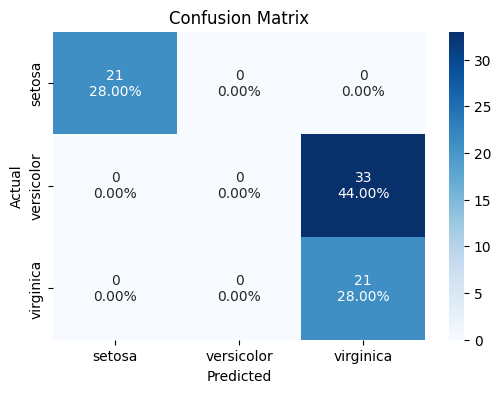

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.00      0.00      0.00        33
           2       0.39      1.00      0.56        21

    accuracy                           0.56        75
   macro avg       0.46      0.67      0.52        75
weighted avg       0.39      0.56      0.44        75



In [14]:
## Train-Test split 0.5
FMultinomial(0.5)
FMultinomial(0.5, 1.5)


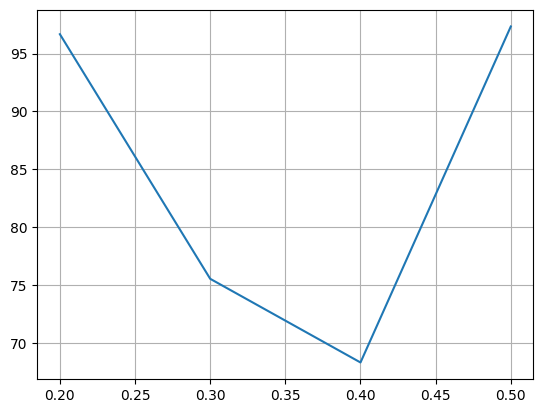

In [15]:
x_points = [float(key) for key in dict_mnb]
y_points = [i*100 for i in dict_mnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Guassian Naive Bayes**

Train-test split: 0.2
**********************************************
Confusion Matrix : 


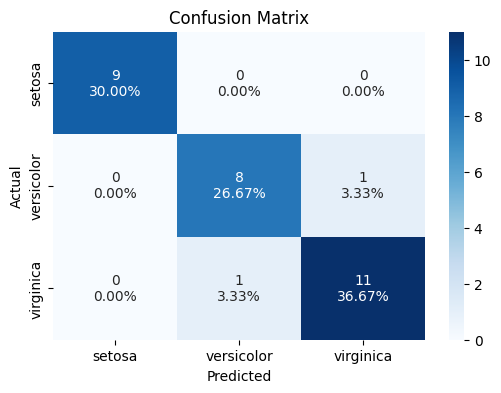

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.89      0.89      0.89         9
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [16]:
def FGaussian(split):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  if(str(split) in dict_gnb):
    dict_gnb[str(split)] = max(accuracy, dict_gnb[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_gnb[str(split)] = accuracy
    RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}

## Train-Test split 0.2
FGaussian(0.2)
# 94, 97, 94, 96,

Train-test split: 0.3
**********************************************
Confusion Matrix : 


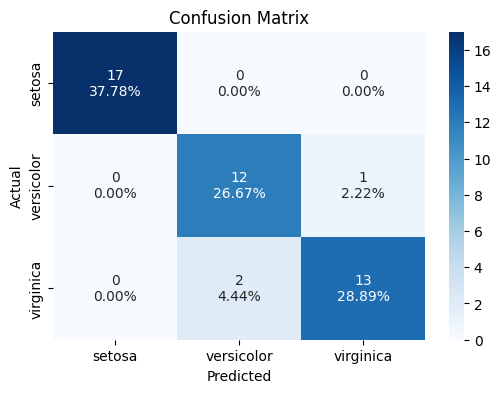

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      0.92      0.89        13
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [17]:
## Train-Test split 0.3
FGaussian(0.3)

Train-test split: 0.4
**********************************************
Confusion Matrix : 


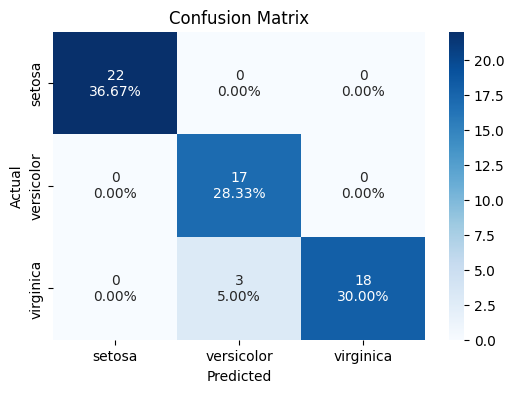

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.85      1.00      0.92        17
           2       1.00      0.86      0.92        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



In [18]:
## Train-Test split 0.4
FGaussian(0.4)

Train-test split: 0.5
**********************************************
Confusion Matrix : 


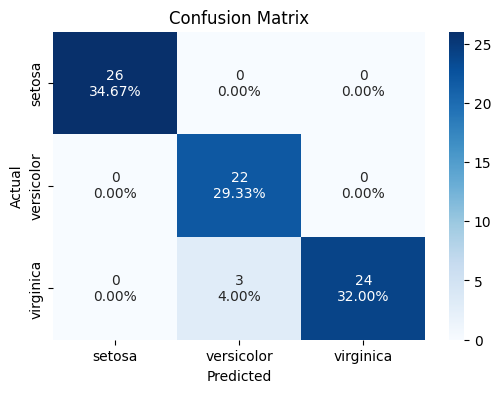

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.88      1.00      0.94        22
           2       1.00      0.89      0.94        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [19]:
## Train-Test split 0.5
FGaussian(0.5)

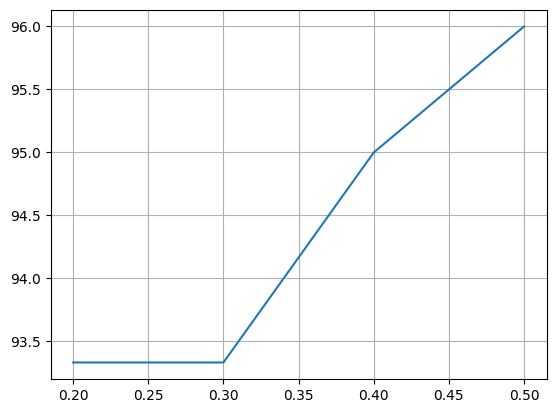

In [20]:
x_points = [float(key) for key in dict_gnb]
y_points = [i*100 for i in dict_gnb.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Decision Tree**

In [21]:
def decision_tree(split, criterion_value):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)

  classifier = DecisionTreeClassifier(criterion = criterion_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("Value: Entropy: " + criterion_value)
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_dtr):
    dict_dtr[str(split)] = max(accuracy, dict_dtr[str(split)])
    if(str(split) == '0.3' and accuracy > dict_bnb[str(split)]):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_dtr[str(split)] = accuracy
    if(str(split) == '0.3'):
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
      
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(classifier,
                    feature_names=column_names,
                    class_names=['outcome1', 'outcome2', 'outcome3'],
                    filled=True)
  


Train-test split: 0.2
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


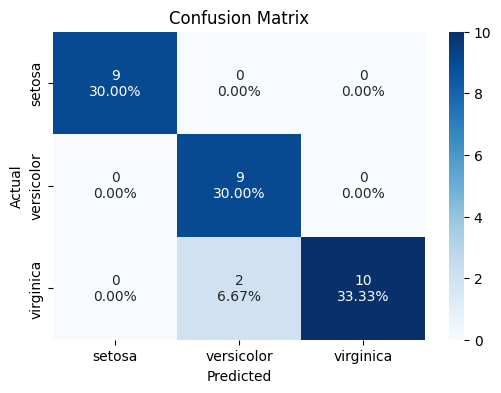

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



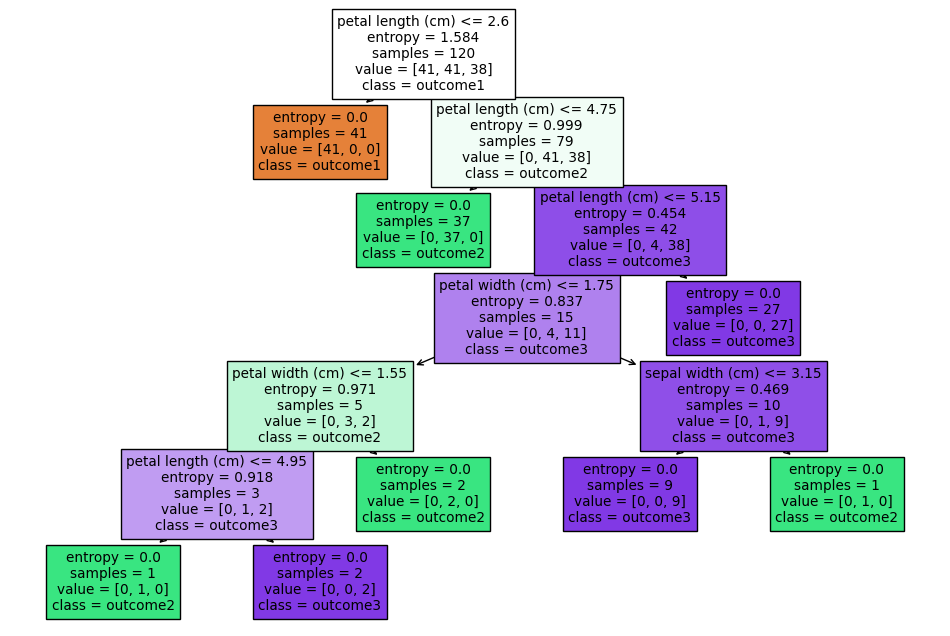

In [22]:
decision_tree(0.2, 'entropy')

Train-test split: 0.2
Value: Entropy: gini
**********************************************
Confusion Matrix : 


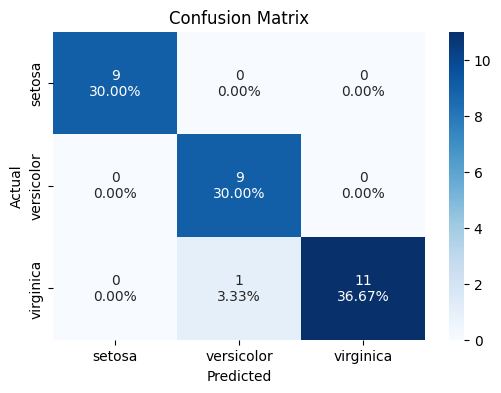

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      1.00      0.95         9
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



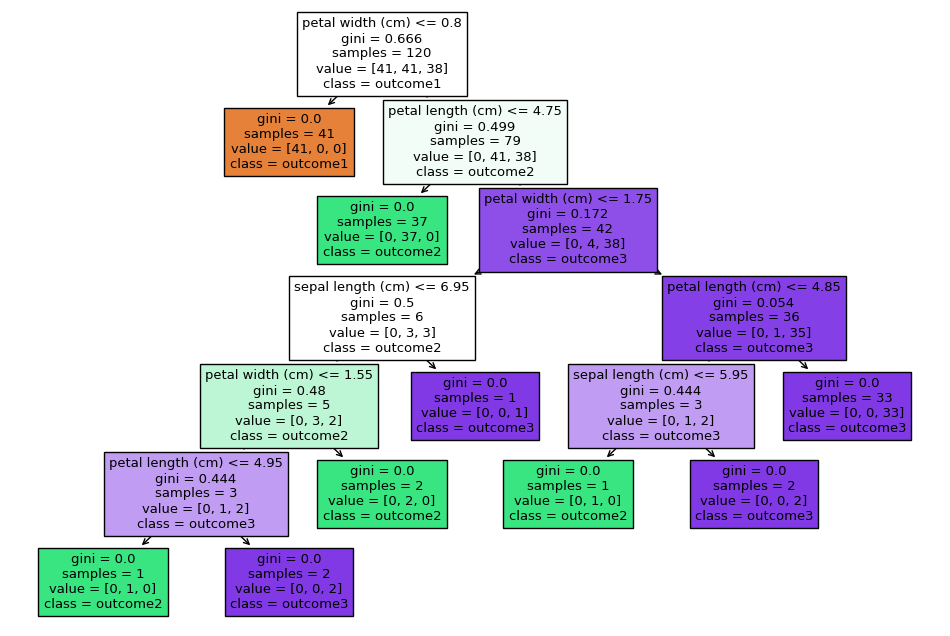

In [23]:
decision_tree(0.2, 'gini')

Train-test split: 0.3
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


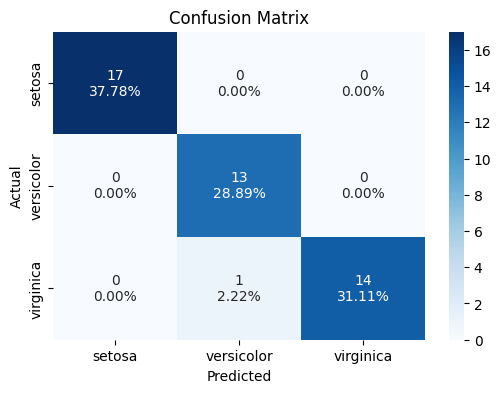

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



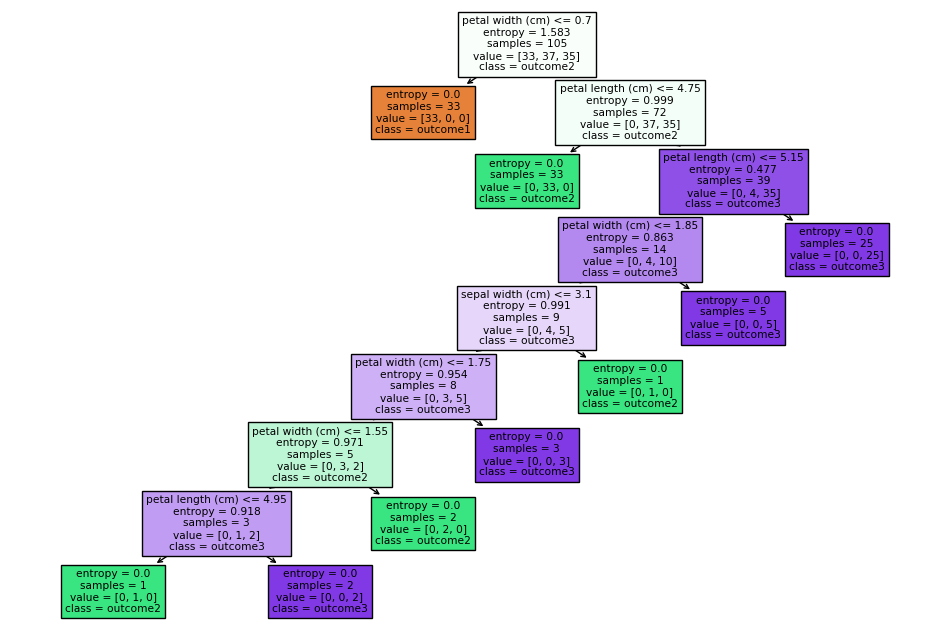

In [24]:
decision_tree(0.3, 'entropy')

Train-test split: 0.3
Value: Entropy: gini
**********************************************
Confusion Matrix : 


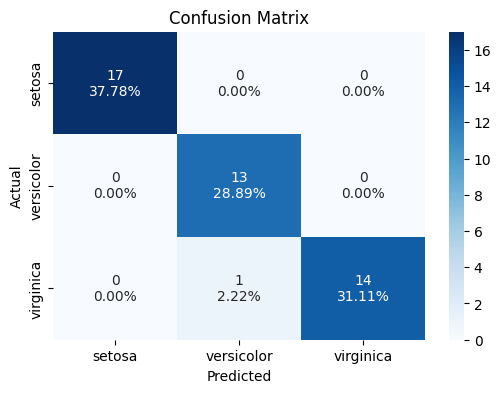

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



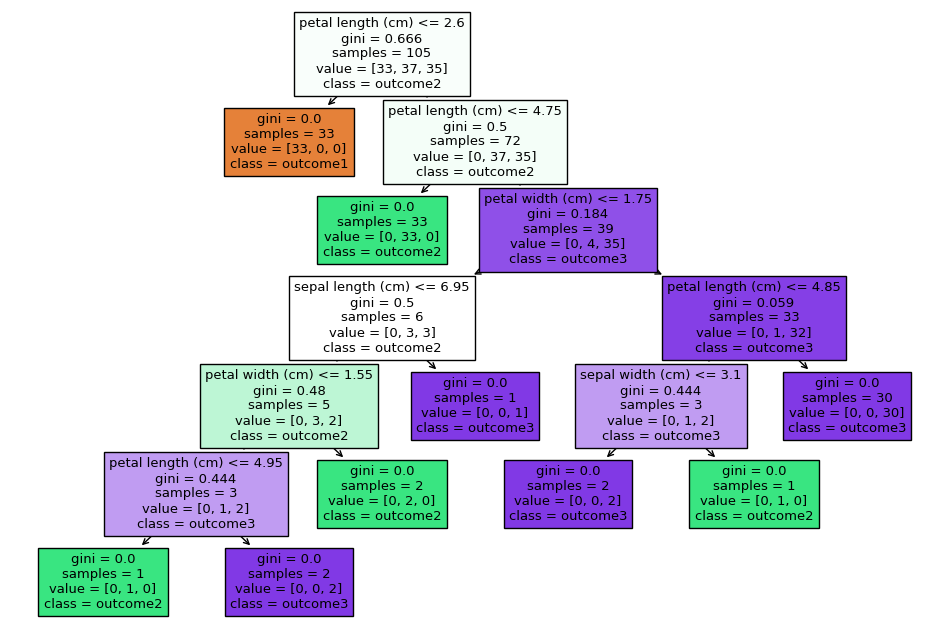

In [25]:

decision_tree(0.3, 'gini')

Train-test split: 0.4
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


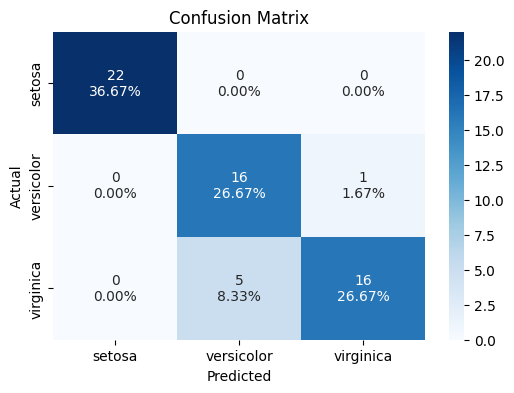

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.76      0.94      0.84        17
           2       0.94      0.76      0.84        21

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.89        60
weighted avg       0.91      0.90      0.90        60



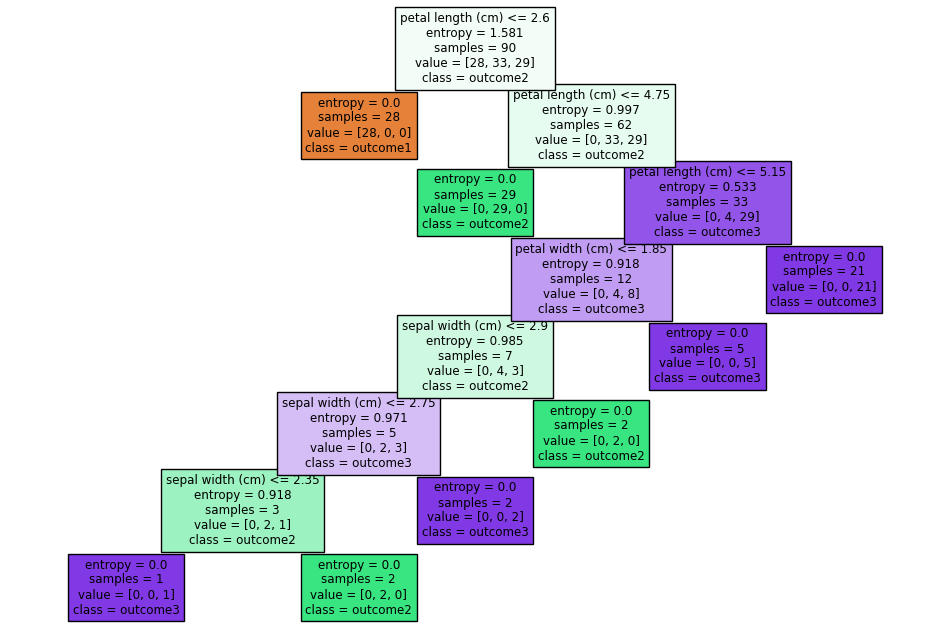

In [26]:
decision_tree(0.4, 'entropy')

Train-test split: 0.4
Value: Entropy: gini
**********************************************
Confusion Matrix : 


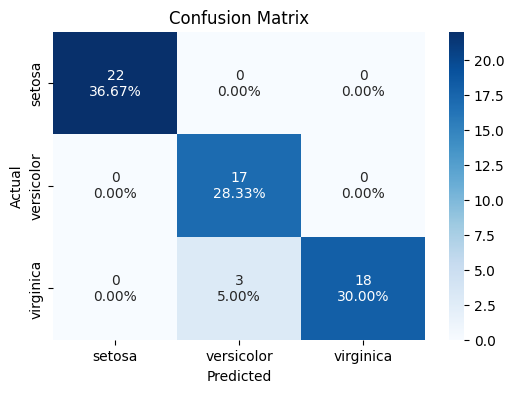

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.85      1.00      0.92        17
           2       1.00      0.86      0.92        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



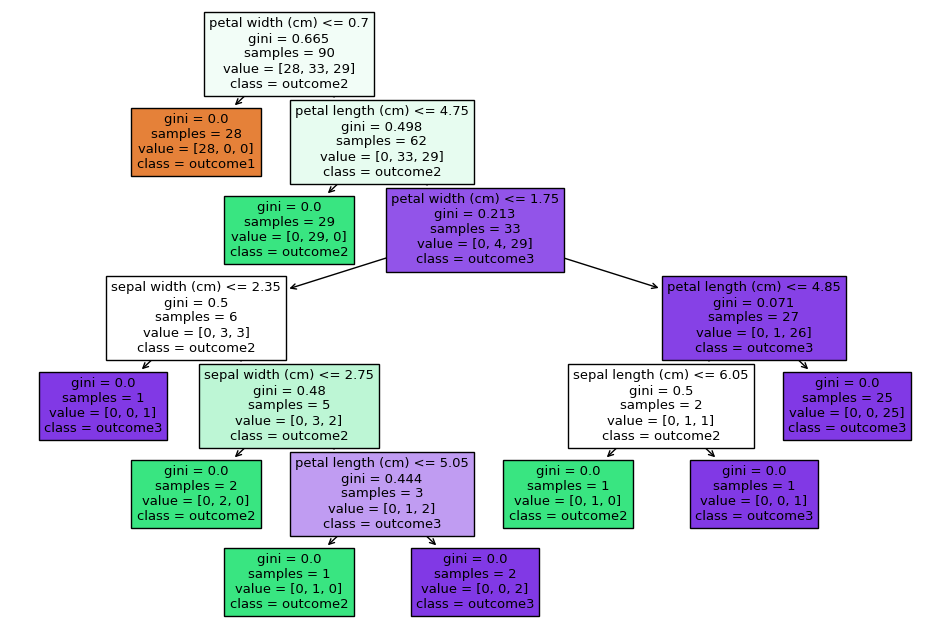

In [27]:

decision_tree(0.4, 'gini')

Train-test split: 0.5
Value: Entropy: entropy
**********************************************
Confusion Matrix : 


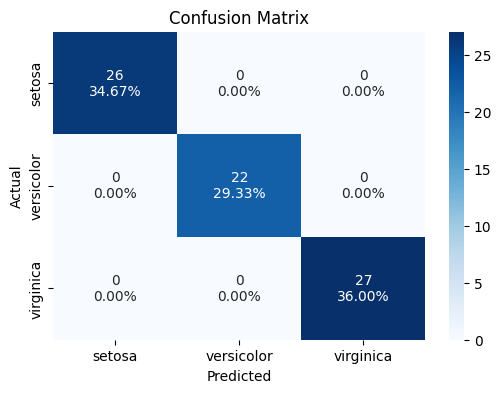

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        27

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



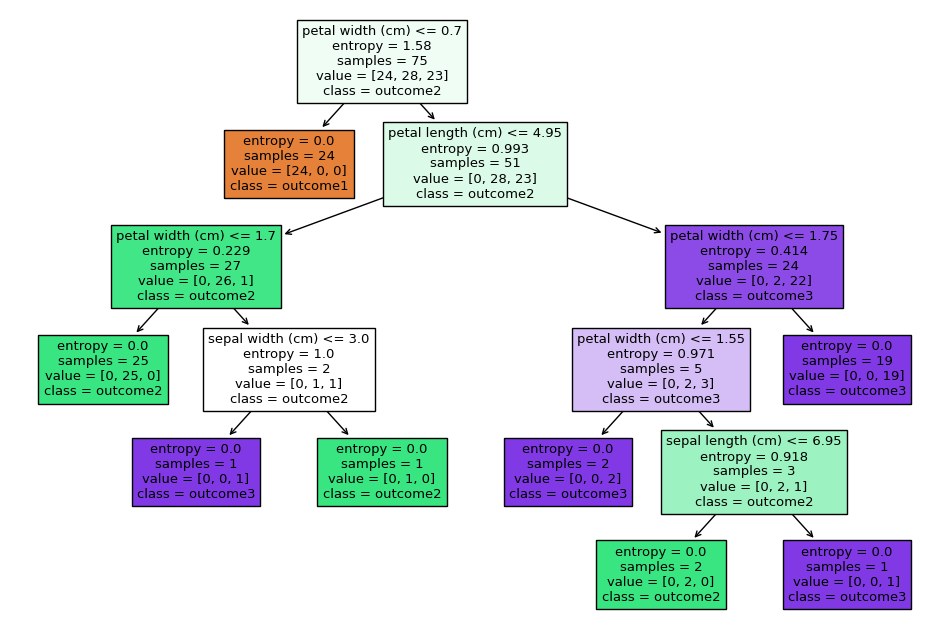

In [28]:
decision_tree(0.5, 'entropy')

Train-test split: 0.5
Value: Entropy: gini
**********************************************
Confusion Matrix : 


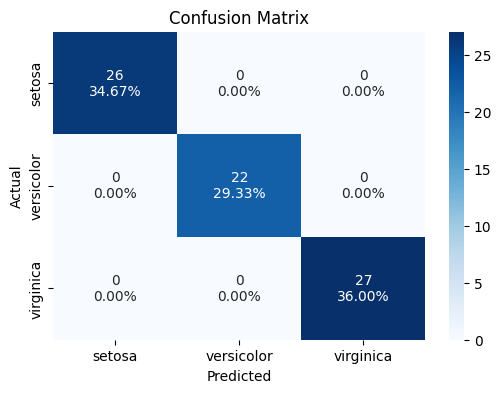

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        27

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



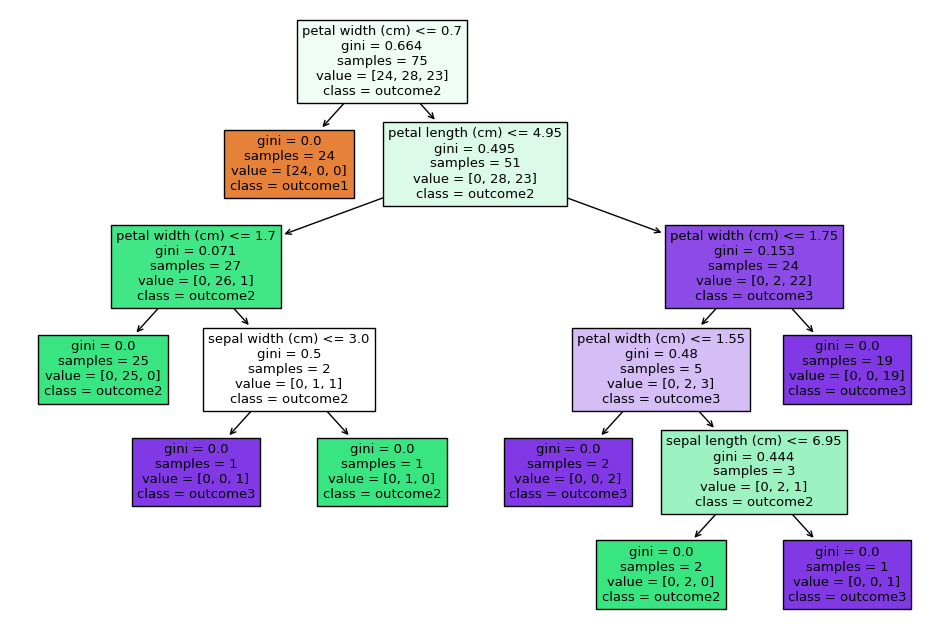

In [29]:
decision_tree(0.5, 'gini')

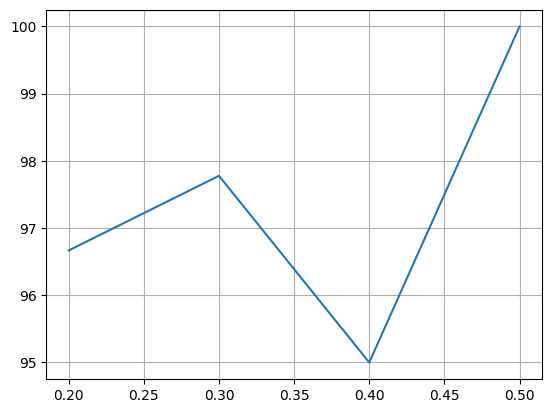

In [30]:
x_points = [float(key) for key in dict_dtr]
y_points = [i*100 for i in dict_dtr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

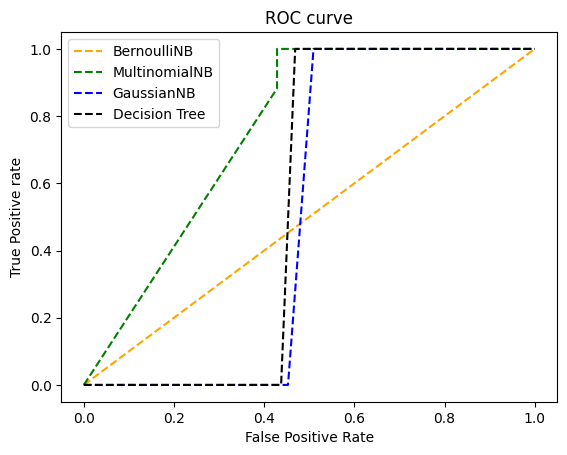

In [31]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucbnb['max']['y_test'], RocAucbnb['max']['y_pred'], pos_label=1)
    fpr4, tpr4, _3 = metrics.roc_curve(RocAucmnb['max']['y_test'], RocAucmnb['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucgnb['max']['y_test'], RocAucgnb['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucdtr['max']['y_test'], RocAucdtr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='BernoulliNB')
    plt.plot(fpr4, tpr4, linestyle='--',color='green', label='MultinomialNB')
    plt.plot(fpr2, tpr2, linestyle='--', color='blue', label= 'GaussianNB')
    plt.plot(fpr3, tpr3, linestyle='--', color='black', label= 'Decision Tree')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()